<a href="https://colab.research.google.com/github/Bhavya-31/9921103089/blob/main/Vehicle_to_Grid_(V2G)_Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages
!pip install pandas numpy matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
BATTERY_CAPACITY = 100  # Battery capacity in kWh
CHARGE_THRESHOLD = 20   # Minimum battery percentage for V2G contribution
GRID_ENERGY_PRICE = 0.15  # Price per kWh the grid pays for energy
PEER_ENERGY_PRICE = 0.10  # Price per kWh for peer-to-peer energy trading


In [3]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 24  # Simulating for 24 hours
grid_demand = np.random.uniform(50, 150, num_samples)  # Demand in kWh
battery_level = np.random.uniform(20, 100, num_samples)  # Battery level in %

# Create a DataFrame
data = pd.DataFrame({
    'hour': range(1, num_samples + 1),
    'grid_demand': grid_demand,
    'battery_level': battery_level
})

data.head()


,hour,grid_demand,battery_level
0,1,87.454012,56.485599
1,2,145.071431,82.814077
2,3,123.199394,35.973903
3,4,109.865848,61.138755
4,5,65.601864,67.393166


In [4]:
def v2g_v2h_simulation(data):
    results = []
    for _, row in data.iterrows():
        battery_level = row['battery_level']
        grid_demand = row['grid_demand']

        # Check if battery level is above the threshold to contribute to V2G
        if battery_level > CHARGE_THRESHOLD:
            # Energy contributed to grid
            energy_contributed = min((battery_level - CHARGE_THRESHOLD) / 100 * BATTERY_CAPACITY, grid_demand)
            revenue = energy_contributed * GRID_ENERGY_PRICE
            energy_to_peer = (battery_level - CHARGE_THRESHOLD) / 200 * BATTERY_CAPACITY  # Peer-to-peer limit
            peer_revenue = energy_to_peer * PEER_ENERGY_PRICE
            energy_flow = "Contributing to Grid and Peers"
        else:
            energy_contributed = 0
            revenue = 0
            energy_to_peer = 0
            peer_revenue = 0
            energy_flow = "Battery below threshold; no contribution"

        # Update results
        results.append({
            'hour': row['hour'],
            'battery_level': battery_level,
            'grid_demand': grid_demand,
            'energy_contributed': energy_contributed,
            'energy_to_peer': energy_to_peer,
            'revenue_from_grid': revenue,
            'revenue_from_peer': peer_revenue,
            'total_revenue': revenue + peer_revenue,
            'energy_flow_status': energy_flow
        })

    return pd.DataFrame(results)

# Run the simulation
simulation_results = v2g_v2h_simulation(data)
simulation_results.head()


,hour,battery_level,grid_demand,energy_contributed,energy_to_peer,revenue_from_grid,revenue_from_peer,total_revenue,energy_flow_status
0,1.0,56.485599,87.454012,36.485599,18.242799,5.472840,1.824280,7.297120,Contributing to Grid and Peers
1,2.0,82.814077,145.071431,62.814077,31.407038,9.422112,3.140704,12.562815,Contributing to Grid and Peers
2,3.0,35.973903,123.199394,15.973903,7.986951,2.396085,0.798695,3.194781,Contributing to Grid and Peers
3,4.0,61.138755,109.865848,41.138755,20.569378,6.170813,2.056938,8.227751,Contributing to Grid and Peers
4,5.0,67.393166,65.601864,47.393166,23.696583,7.108975,2.369658,9.478633,Contributing to Grid and Peers


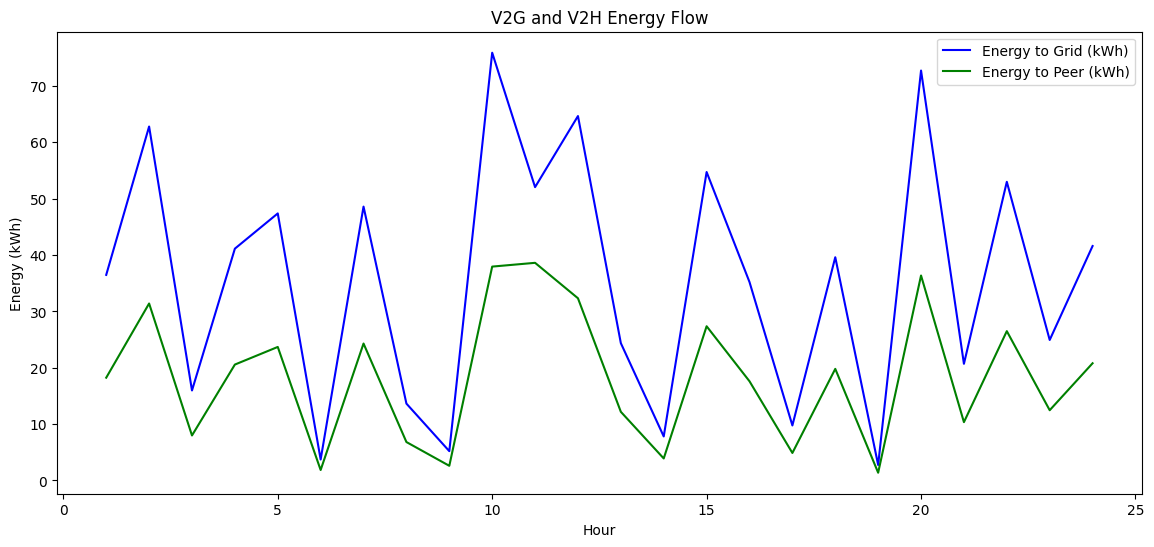

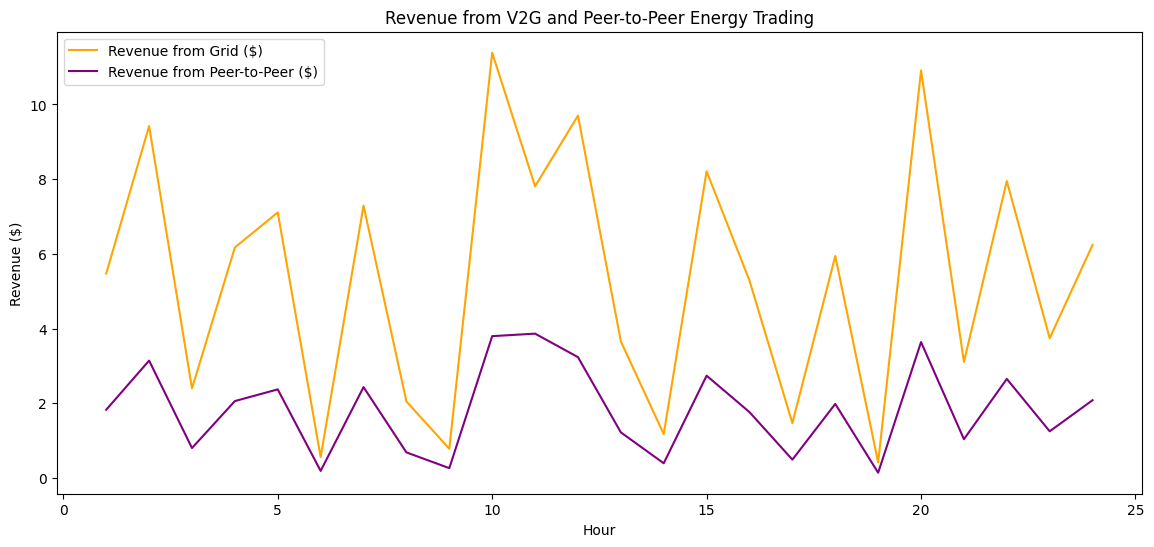

In [5]:
# Plot energy contributed to grid and peers over time
plt.figure(figsize=(14, 6))

# Energy contributed to grid
plt.plot(simulation_results['hour'], simulation_results['energy_contributed'], label='Energy to Grid (kWh)', color='blue')

# Energy contributed to peer
plt.plot(simulation_results['hour'], simulation_results['energy_to_peer'], label='Energy to Peer (kWh)', color='green')

plt.xlabel('Hour')
plt.ylabel('Energy (kWh)')
plt.title('V2G and V2H Energy Flow')
plt.legend()
plt.show()

# Plot revenue from grid and peer trading
plt.figure(figsize=(14, 6))

# Revenue from grid
plt.plot(simulation_results['hour'], simulation_results['revenue_from_grid'], label='Revenue from Grid ($)', color='orange')

# Revenue from peer trading
plt.plot(simulation_results['hour'], simulation_results['revenue_from_peer'], label='Revenue from Peer-to-Peer ($)', color='purple')

plt.xlabel('Hour')
plt.ylabel('Revenue ($)')
plt.title('Revenue from V2G and Peer-to-Peer Energy Trading')
plt.legend()
plt.show()


In [6]:
# Total revenue calculations
total_grid_revenue = simulation_results['revenue_from_grid'].sum()
total_peer_revenue = simulation_results['revenue_from_peer'].sum()
total_revenue = simulation_results['total_revenue'].sum()

print(f"Total Revenue from Grid Contribution: ${total_grid_revenue:.2f}")
print(f"Total Revenue from Peer-to-Peer Contribution: ${total_peer_revenue:.2f}")
print(f"Total Daily Revenue: ${total_revenue:.2f}")

# Display the final data summary
simulation_results[['hour', 'battery_level', 'grid_demand', 'energy_contributed',
                   'energy_to_peer', 'total_revenue', 'energy_flow_status']].head(10)


Total Revenue from Grid Contribution: $128.23
Total Revenue from Peer-to-Peer Contribution: $44.00
Total Daily Revenue: $172.23


,hour,battery_level,grid_demand,energy_contributed,energy_to_peer,total_revenue,energy_flow_status
0,1.0,56.485599,87.454012,36.485599,18.242799,7.297120,Contributing to Grid and Peers
1,2.0,82.814077,145.071431,62.814077,31.407038,12.562815,Contributing to Grid and Peers
2,3.0,35.973903,123.199394,15.973903,7.986951,3.194781,Contributing to Grid and Peers
3,4.0,61.138755,109.865848,41.138755,20.569378,8.227751,Contributing to Grid and Peers
4,5.0,67.393166,65.601864,47.393166,23.696583,9.478633,Contributing to Grid and Peers
5,6.0,23.716033,65.599452,3.716033,1.858017,0.743207,Contributing to Grid and Peers
6,7.0,68.603588,55.808361,48.603588,24.301794,9.720718,Contributing to Grid and Peers
7,8.0,33.641930,136.617615,13.641930,6.820965,2.728386,Contributing to Grid and Peers
8,9.0,25.204127,110.111501,5.204127,2.602064,1.040825,Contributing to Grid and Peers
9,10.0,95.910843,120.807258,75.910843,37.955421,15.182169,Contributing to Grid and Peers
